# DCS 540 Data Preparation (DSC540-T301 2225-1)
## Bellevue University
## Assignment: Weeks 9 & 10 Exercises
## Author: Jake Meyer
## Date: 05/18/2022

### 1. Data Wrangling with Python: Activity 9, page 294
### Activity 9: Extracting the Top 100 eBooks from Gutenberg

In [124]:
'''
Import the essential libraries to complete Activity 9 (and other Activities for Weeks 9 & 10).
Any additional libraries will be imported later in the notebook.
'''
import numpy as np

import pandas as pd
   
from bs4 import BeautifulSoup

import requests

import re

import urllib.request, urllib.parse, urllib.error

import ssl

import json

import matplotlib.pyplot as plt

In [125]:
'''
Check the SSL certificate.
'''
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE

In [126]:
'''
Activity 9 requires the URL of Project Gutenberg's Top 100 eBooks.
URL from Data Wrangling with Python GitHub Repository is provided below:
https://www.gutenberg.org/browse/scores/top
Follow the steps on page 239 to store url link and use get method from requests.
'''
url1 = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url1)

In [127]:
'''
Create a small function to check the status of the request to the url.
Follow the steps on page 241 from the text (Data Wrangling with Python)
to create the function.
'''
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed, something went wrong!")
        return -1

In [128]:
'''
Check the request with the status_check(r) function.
Determine if the request was successful.
'''
status_check(response)

Success!


1

In [129]:
'''
Create a function that will check the encoding of the web page.
Reference page 242 for additional details for the function.
'''
def encoding_check(r):
    return (r.encoding)

In [130]:
'''
Check the encoding type of the web page. 
'''
encoding_check(response)

'UTF-8'

In [131]:
'''
Create a utility function to decode the contents of the response.
Reference page 242 for guidance on creating the utility function.
'''
def decode_content(r,encoding):
    return (r.content.decode(encoding))

In [132]:
'''
Use the function to decode the contents of response.
'''
contents = decode_content(response,encoding_check(response))

In [133]:
'''
Check the type of content.
'''
type(contents)

str

In [134]:
'''
Read the content with Beautiful Soup.
From page 244, use BeautifulSoup() to read the content with 'html.parser'.
'''
soup = BeautifulSoup(contents, 'html.parser')

In [135]:
'''
Review the first 2500 characters of content within the Gutenberg Project site.
'''
print(soup.prettify()[0:2500])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Top 100 | Project Gutenberg
  </title>
  <link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
  <link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
  <link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
  <link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
   <meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
   <meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
   <link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
    <link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon">
     <meta content="Project Gutenberg" property="og:title"/>
     <meta content="website" property="og:type"/>
     <meta content=

In [136]:
'''
Create a list of links by using find_all() for href elements.
Use a for loop (similar to the one seen on page 253) to create the list of links 
'''
# Empty list for the HTTP hyperlinks
link_list = []

# For loop to get all the href elements and store in link_list.
for link in soup.find_all('a'):
    link_list.append(link.get('href'))

In [137]:
'''
Print the first 50 elements in link_list.
'''
link_list[0:50]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/84',
 '/ebooks/11',
 '/ebooks/64317',
 '/ebooks/1661',
 '/ebooks/20228',
 '/ebooks/98',
 '/ebooks/174',
 '/ebooks/2542',
 '/ebooks/345',
 '/ebooks/844',
 '/ebooks/2701',
 '/ebooks/1952',
 '/ebooks/1400',
 '/ebooks/68107',
 '/ebooks/2591',
 '/ebooks/1080']

In [138]:
'''
Use Regex to find the file digits for the https links.
Create an empty list to store the file digits.
'''
booknum = []

In [139]:
'''
Create a function to find the file numbers for the numeric digits within the href strings.
Reqiired help from GitHub repository for the function to generate list of file numbers over 
range 33-133. 
'''
for i in range(33,133):
    link=link_list[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        booknum.append(int(n[0]))

In [140]:
'''
Print the booknum list with all the file digits stored within it.
'''
print(booknum)

[1342, 84, 11, 64317, 1661, 20228, 98, 174, 2542, 345, 844, 2701, 1952, 1400, 68107, 2591, 1080, 35899, 1260, 68103, 43, 47629, 32449, 76, 25344, 68105, 1184, 5200, 2852, 4300, 2600, 55, 68101, 219, 2554, 1232, 6130, 996, 5740, 46, 74, 68102, 120, 408, 2814, 35, 1727, 514, 205, 160, 45, 33044, 16, 1250, 4363, 215, 135, 158, 68099, 30254, 28054, 768, 244, 68096, 36, 766, 44440, 68108, 7370, 1513, 3825, 2500, 6737, 829, 236, 730, 902, 67098, 10676, 1497, 68110, 68106, 2148, 16328, 58585, 1399, 27827, 3207, 203, 10007, 113, 15845, 41, 3600, 68094, 105, 68098, 10, 2781, 43453]


In [141]:
'''
Assignment asks to use .text method to print only the first 2,000 characters of the soup object.
'''
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-05-17158578
last 7 days1084298
last 30 days5020257



Top 100 EBooks yesterd

In [142]:
'''
Per the assignment, search the extracted text to find the names of the Top 100 EBooks yesterday.
Create an empty list to store title information initially. 
Also, create a start index based on the Top 100 EBooks yesterday text. 
'''
initial_title_list = []

start_index = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [143]:
'''
Create a function to go through the 100 lines following the Top 100 Ebooks yesterday text.
Utilize splitlines() method.
'''
for i in range(108):
    initial_title_list.append(soup.text.splitlines()[start_index+2+i])

In [144]:
'''
Create an empty list to store the title text under final_title_list. 
Utilize match and span to pull only the text from the name strings.
'''
final_title_list = []

for i in range(108):
    id1,id2=re.match("^[a-zA-Z,\.\'\;\-\:\" ]*",initial_title_list[i]).span()
    final_title_list.append(initial_title_list[i][id1:id2])


In [145]:
'''
Print the Ebook titles under the Top 100 Authors yesterday section.
Skip the first 8 lines since the starting index is from the section above.
'''
print(final_title_list[8:]) 

['Pride and Prejudice by Jane Austen ', 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley ', "Alice's Adventures in Wonderland by Lewis Carroll ", 'The Great Gatsby by F. Scott  Fitzgerald ', 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ', 'Noli Me Tangere by Jos', 'A Tale of Two Cities by Charles Dickens ', 'The Picture of Dorian Gray by Oscar Wilde ', "A Doll's House : a play by Henrik Ibsen ", 'Dracula by Bram Stoker ', 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde ', 'Moby Dick; Or, The Whale by Herman Melville ', 'The Yellow Wallpaper by Charlotte Perkins Gilman ', 'Great Expectations by Charles Dickens ', 'Juke-Box by Woodrow Wilson Smith ', "Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm ", 'A Modest Proposal by Jonathan Swift ', 'The Philippines a Century Hence by Jos', 'Jane Eyre: An Autobiography by Charlotte Bront', 'Twenty years at sea: Leaves from my old log-books by Frederic Stanhope Hill ', 'T

### 2. Data Wrangling with Python: Activity 10, page 295
### Activity 10: Building Your Own Movie Database by Reading an API

In [146]:
'''
Obtain an API Key from http://www.omdbapi.com/.
Create a JSON file with the API Key and store in same working repository as this notebook.
The API Key is stored under 'OMDBapi' in APIkey.json.
Open the APIkey.json file in this cell.
'''
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [147]:
'''
The url provided in the email from the site for the API Key is listed below:
http://www.omdbapi.com/?i=tt3896198&apikey=xxxxxxx.
This should be the final URL used, but I will construct the final URL with the following steps.
'''
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [148]:
'''
Per the assignment, write a utility function called print_json.
The utility function will print movie data from a JSON file.
'''
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [149]:
'''
Per the assignment, write a utility function called save_poster.
Use the os module.
The poster data is stored under the JSON key 'Poster'.
Write the poster data to a file and close it once done.
'''
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [150]:
'''
Per the assignment, write a utility function called search_movie.
The function will search for a movie by name, save the movie poster in the 
working repository, and utilize try-except loops. 
'''
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [151]:
'''
Run a test of search_movie() by searching for Titanic.
'''
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=4ab138d1
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,131,404
imdbID: tt0120338
--------------------------------------------------


In [152]:
'''
Run a test of search_movie() by entering random_error.
'''
search_movie("random_error")

Retrieving the data of "random_error" now... 
http://www.omdbapi.com/?t=random_error&apikey=4ab138d1
Error encountered:  Movie not found!


### 3. Connect to the Twitter API and do a simple data pull
* a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)
* b. Sign in to apps.twitter.com
* c. Click “Create New App”
* d. Give your app a name and description
* e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment
* f. Create an access token
* g. You should receive a consumer key and a token
* h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)
* i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)
* ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

In [153]:
'''
Install twitter modules.
'''
# pip install twitter
# pip install python-twitter

'\nInstall twitter modules.\n'

In [154]:
'''
Import twitter.
'''
import twitter

In [155]:
'''
Created an external JSON file with the consumer key, consumer secret key, access token key, and access token secret key.
Use the with open() function to read the JSON keys and store under each variable name with an _input.
'''
with open('TwitterAPIkey.json') as f:
    keys = json.load(f)
    consumer_key_input = keys['consumer_key']
    consumer_secret_input = keys['consumer_secret']
    access_token_key_input = keys['access_token_key']
    access_token_secret_input = keys['access_token_secret']

In [156]:
'''
Use twitter.Api() to conncect to the twitter API as specified in the following website link:
https://www.sitepoint.com/how-to-create-a-twitter-app-and-api-interface-via-python/
'''
api = twitter.Api(consumer_key=consumer_key_input,
    consumer_secret=consumer_secret_input,
    access_token_key=access_token_key_input,
    access_token_secret=access_token_secret_input)

In [157]:
'''
Verify the connection with the Twitter API.
'''
print(api.VerifyCredentials())

{"created_at": "Mon May 16 04:42:06 +0000 2022", "default_profile": true, "description": "Male. Engineer. 30 years old.", "friends_count": 1, "id": 1526060169200709633, "id_str": "1526060169200709633", "name": "Jake Meyer", "profile_background_color": "F5F8FA", "profile_image_url": "http://pbs.twimg.com/profile_images/1526060397278638080/YDeXU_Fb_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1526060397278638080/YDeXU_Fb_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "protected": true, "screen_name": "meyerjake46", "withheld_in_countries": []}


In [158]:
'''
Use GetSearch() to find tweets based on the term bellevue university since 11/29/2020. Cap the tweets at a count of 15.
'''
api.GetSearch(term='bellevue university', since=2020-11-29, count=15)

[Status(ID=1527008349509890052, ScreenName=ABDugoutStories, Created=Wed May 18 19:28:55 +0000 2022, Text='RT @DawgsAcademy: Logan Grant, recent Bellevue University commit, had another outstanding year for the Bismarck State Mystics!\n\nLook for Lo…'),
 Status(ID=1526992898192920577, ScreenName=JoeMcFarland, Created=Wed May 18 18:27:31 +0000 2022, Text='RT @DawgsAcademy: Logan Grant, recent Bellevue University commit, had another outstanding year for the Bismarck State Mystics!\n\nLook for Lo…'),
 Status(ID=1526989346083069956, ScreenName=GHS_Principal1, Created=Wed May 18 18:13:24 +0000 2022, Text='RT @GHSCouns: Off to Bellevue University! @GHS_Principal1 https://t.co/0iYzSChxeo'),
 Status(ID=1526989297752104963, ScreenName=GHSCouns, Created=Wed May 18 18:13:13 +0000 2022, Text='Off to Bellevue University! @GHS_Principal1 https://t.co/0iYzSChxeo'),
 Status(ID=1526987782501040129, ScreenName=CoachCoxBSB, Created=Wed May 18 18:07:12 +0000 2022, Text='RT @DawgsAcademy: Logan Grant, recent

In [159]:
'''
Use GetSearch() to find tweets based on the term data science since 1/1/2020. Cap the tweets at a count of 10.
'''
api.GetSearch(term='data science', since=2020-1-1, count=10)

[Status(ID=1526634610343522306, ScreenName=SOFIAtelescope, Created=Tue May 17 18:43:49 +0000 2022, Text='No, this isn’t a modern rendition of “The Starry Night.” \n\nThe role of magnetic fields in stellar birth is complica… https://t.co/5dIlXyZRf6'),
 Status(ID=1526337705973530624, ScreenName=AP, Created=Mon May 16 23:04:01 +0000 2022, Text='The official U.S. toll is based on death certificate data compiled by the CDC. But the real number of lives lost to… https://t.co/vS9zxljN7p'),
 Status(ID=1526534249930711042, ScreenName=audubonsociety, Created=Tue May 17 12:05:01 +0000 2022, Text='Being in nature brings a sense of calm and renewal. Now science is backing up our intuition with data and revealing… https://t.co/1S2LGmQaAP'),
 Status(ID=1527012526835257344, ScreenName=ecobearwitness, Created=Wed May 18 19:45:31 +0000 2022, Text='Why Sustainable Land Use Is Key To Achieve Our Carbon Neutrality Targets: The Wire Science https://t.co/1kP7xCqK9a… https://t.co/zbQDRqkPxx'),
 Status(ID=1527

### 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
* a. Line
* b. Scatter
* c. Bar
* d. Histogram
* e. Density Plot
* f. Pie Chart

In [160]:
'''
For the 4th part of this assignment, I've chosen to use the Milestone3_final_df.csv generated
last week. Read the file using read_csv().
'''
df = pd.read_csv('Milestone3_final_df.csv')

In [161]:
'''
Show the first five rows of the dataframe for reference.
'''
df.head(5)

,state_name,average_salary_state,hourly_rate_state,job_count_state,city,average_salary_city,hourly_rate_city
0,Alabama,77743,37.38,390,No Data,77743.0,37.38
1,Alaska,84755,40.75,148,No Data,84755.0,40.75
2,Arizona,88333,42.47,831,Phoenix,88469.0,42.53
3,Arkansas,82909,39.86,266,No Data,82909.0,39.86
4,California,126682,60.90,3874,San Francisco,138170.0,66.43


In [162]:
'''
First visualization will be a scatter plot of average salary vs. open job requisitions.
Start by setting up variables x and y from the csv file.
'''
x = df['job_count_state']
y = df['average_salary_state']

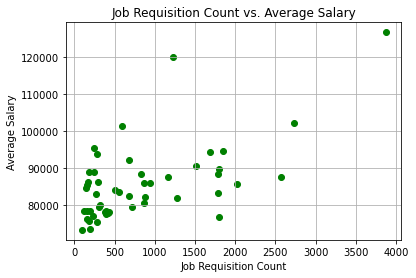

In [163]:
'''
Create the scatter plot of average salary vs. open job requisitions.
'''

plt.scatter(x,y,marker = 'o',color='g')
plt.grid(True)
plt.title('Job Requisition Count vs. Average Salary')
plt.xlabel('Job Requisition Count')
plt.ylabel('Average Salary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

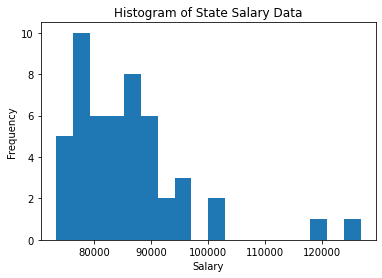

In [164]:
'''
Second visualization will be a histogram.
Plot a histogram of the state salary data to visualize the distribution of data in an alternative format.
Use plt.hist() to create the plot.
'''
plt.hist(df['average_salary_state'], bins=18, rwidth = 1)
plt.grid(False) 
plt.title("Histogram of State Salary Data", fontsize=12)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show

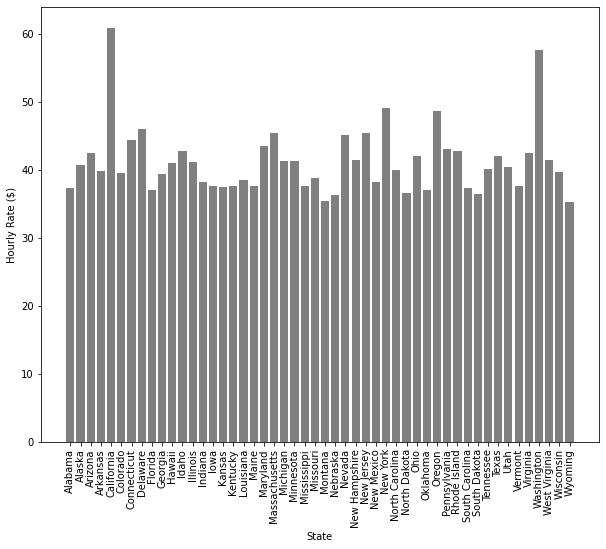

In [165]:
'''
Third visualization chart will be a bar plot. This plot will show the hourly rate plotted by state.
'''

plt.figure(figsize=(10,8))
plt.bar(df['state_name'],df['hourly_rate_state'], color = 'grey')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Hourly Rate ($)')
plt.show()